In [1]:
# Import all the libraries for data description
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns # for data visualisation -- based on matplotlib

#scikit-learn for the data preprocessing and the feature scaling
from sklearn.preprocessing import StandardScaler


#scikit-learn for modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt





In [2]:
#Walmart data loading and exploring 
data_test = pd.read_csv(r"C:\Users\Desktop\walmart forecasting sales from Kaggle\Data_walmart_kaggle\test.csv")
data_train = pd.read_csv(r"C:\Users\Desktop\walmart forecasting sales from Kaggle\Data_walmart_kaggle\train.csv")
data_features = pd.read_csv(r"C:\Users\Desktop\walmart forecasting sales from Kaggle\Data_walmart_kaggle\features.csv")
data_stores = pd.read_csv(r"C:\Users\Desktop\walmart forecasting sales from Kaggle\Data_walmart_kaggle\stores.csv")



In [3]:
data_test.shape

(115064, 4)

In [4]:
data_test.head()  # print first five test data




,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
data_train.shape


(421570, 5)

In [6]:
data_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
data_features.shape

(8190, 12)

In [8]:
data_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
data_stores.shape


(45, 3)

In [10]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
dftrainfeatures = pd.merge(data_train, data_features, on = ['Store','Date','IsHoliday'], how = 'inner')
dftrain = pd.merge(dftrainfeatures, data_stores, on = ['Store'], how = 'inner')



In [12]:
dftrainfeatures.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [13]:
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [14]:
# Removing the null values (NaN) from the datasets (otherwise, it gives errors) and confirming the change 
dftrainfeatures.dropna(inplace = True)
dftrain.dropna(inplace = True) 


In [15]:
# Changing caterogical value to integer
dftrain['IsHolidayInte'] = [int(x) for x in list(dftrain.IsHoliday)]

In [16]:
dftrainfeatures.shape

(97056, 14)

In [17]:
dftrainfeatures.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,1,2,2011-11-11,44936.47,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,1,3,2011-11-11,9959.64,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,1,4,2011-11-11,36826.52,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,1,5,2011-11-11,31002.65,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866


In [18]:
dftrain.shape

(97056, 17)

In [19]:
dftrain.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHolidayInte
6587,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,0
6588,1,2,2011-11-11,44936.47,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,0
6589,1,3,2011-11-11,9959.64,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,0
6590,1,4,2011-11-11,36826.52,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,0
6591,1,5,2011-11-11,31002.65,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,0


In [20]:
from datetime import datetime as dt


In [21]:
dftrain['Date'] = [dt.strptime(y,'%Y-%m-%d') for y in list(dftrain['Date'])]
dftrain['Date'].head()

6587   2011-11-11
6588   2011-11-11
6589   2011-11-11
6590   2011-11-11
6591   2011-11-11
Name: Date, dtype: datetime64[ns]

In [22]:
# Dividing dftrain into X and Y (features)
X_final = dftrain[['Store','Temperature','Fuel_Price','CPI','Unemployment','Dept','Size','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHolidayInte']].copy()
y_final = dftrain[['Weekly_Sales']].copy()



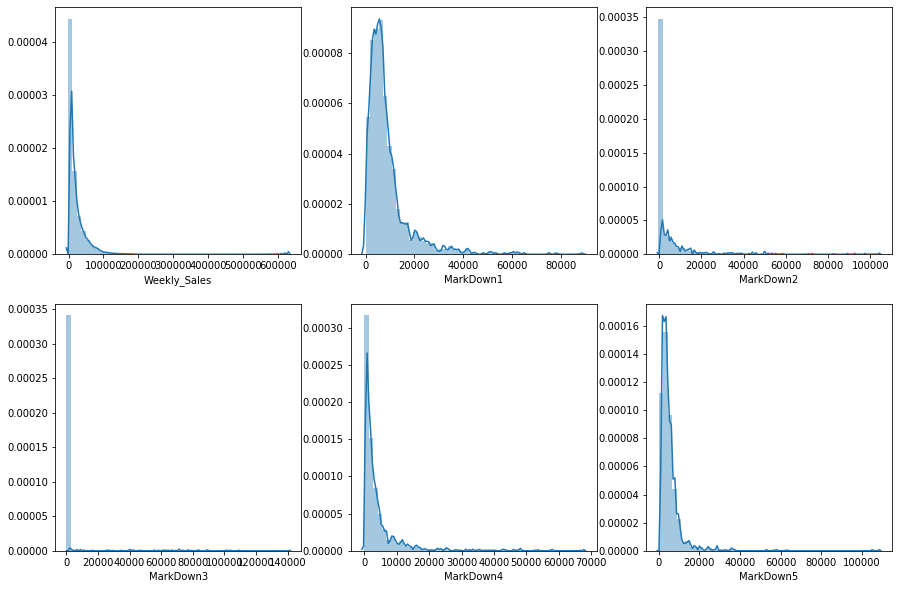

In [23]:
# Checking weekly_sales and visualizing the data
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.distplot(dftrain['Weekly_Sales'])
plt.subplot(232)
sns.distplot(dftrain['MarkDown1'])
plt.subplot(233)
sns.distplot(dftrain['MarkDown2'])
plt.subplot(234)
sns.distplot(dftrain['MarkDown3'])
plt.subplot(235)
sns.distplot(dftrain['MarkDown4'])
plt.subplot(236)
sns.distplot(dftrain['MarkDown5'])

<Figure size 1080x720 with 0 Axes>

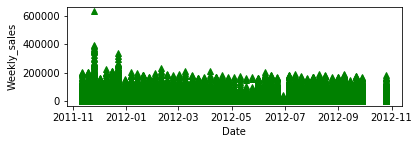

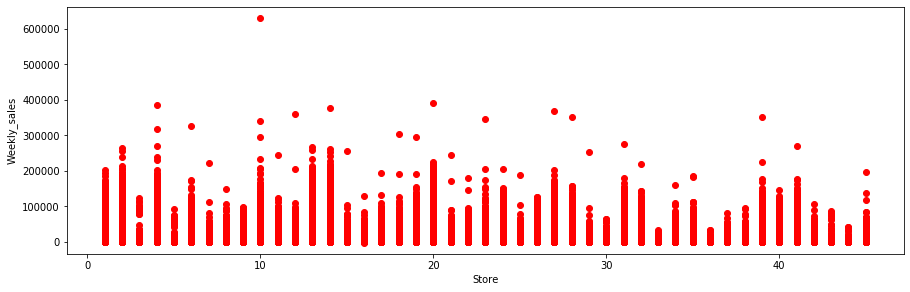

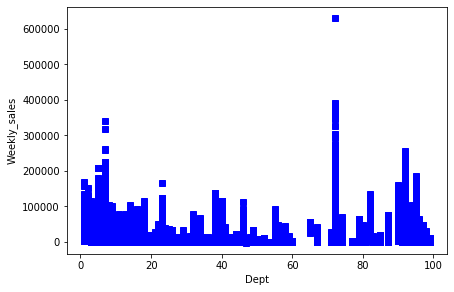

<Figure size 1080x720 with 0 Axes>

In [25]:
# Checking weekly_sales with respect to date, store, and department
plt.subplot(211)
plt.xlabel('Date')
plt.ylabel('Weekly_sales')
plt.plot(dftrain.Date, dftrain.Weekly_Sales, 'g^')
plt.figure(figsize=(15,10))
plt.subplot(212)
plt.xlabel('Store')
plt.ylabel('Weekly_sales')
plt.plot(dftrain.Store, dftrain.Weekly_Sales, 'ro')
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.xlabel('Dept')
plt.ylabel('Weekly_sales')
plt.plot(dftrain.Dept, dftrain.Weekly_Sales, 'bs')
plt.figure(figsize=(15,10))


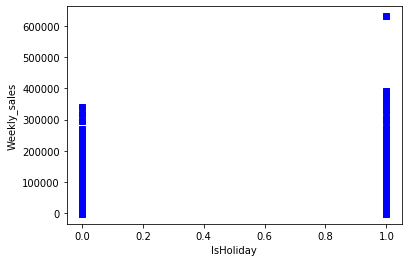

In [26]:
# Comparing sales during holidays and normal days, where 0 is for normal day and 1 for holiday
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_sales')
plt.plot(dftrain.IsHolidayInte, dftrain.Weekly_Sales,'bs')


In [27]:
# Test train split
# Dividing Datasheets into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )


In [28]:
# Feature scaling done only in X
# Feature scaling is a method used to normalize the range of independent variables or features of data
# Standard scaling will transform  data such that its distribution will have a mean value 0 and standard deviation of 1

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train.astype(np.float))
X_test= sscaler.transform(X_test.astype(np.float))



In [29]:
# Lower values of RMSE indicate better fit.
# Linear regression --------------->

lr = LinearRegression().fit(X_train,y_train)
y_train_predic = lr.predict(X_train)
y_test_predic = lr.predict(X_test)

# Prediction and performance measurement -- Rmse = root mean squared error
mse_lr = mean_squared_error(y_test, y_test_predic)
rmse_lr = sqrt(mse_lr)

# Printing the scores
print('linear regression coefficient:{}'.format(lr.coef_))
print('linear regression intercept:{}'.format(lr.intercept_))
print('linear train score %.3f, linear test score: %.3f' % (lr.score(X_train, y_train),lr.score(X_test, y_test)))

print('MSE: %.3f' % mse_lr)
print('RMSE: %.3f' % rmse_lr)



linear regression coefficient:[[-1873.87932492    41.47576408  -299.23745289 -1266.66029227
   -657.62685779  3324.65926397  5124.75780007   152.97919733
   -108.98870809  1263.42893504  -101.32518321   596.93000189
    -19.90445361]]
linear regression intercept:[17828.9116367]
linear train score 0.072, linear test score: 0.077
MSE: 566872302.765
RMSE: 23809.080


In [30]:
# Decision tree ---------->
dt = DecisionTreeRegressor(random_state = 0)

# Model fitting
dt = dt.fit(X_train,y_train.values.ravel())
y_train_predic = dt.predict(X_train)
y_test_predic = dt.predict(X_test)

# Prediction and performance measurement -- Rmse = root mean squared error
mse_dt = mean_squared_error(y_test, y_test_predic)
rmse_dt = sqrt(mse_dt)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)



dt train score 1.000, dt test score: 0.896
MSE: 63568160.627
RMSE: 7972.964


In [36]:
# Random forest ------->
rforest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
# Model fitting
rforest.fit(X_train,y_train.values.ravel())
y_train_predic_rf = rforest.predict(X_train)
y_test_predic_rf = rforest.predict(X_test)
train = rforest.score(X_train, y_train)
test = rforest.score(X_test, y_test)

# Prediction and performance measure Rmse= root mean squared error
mse_rf = mean_squared_error(y_test, y_test_predic_rf)
rmse_rf = sqrt(mse_rf)

#print score
print('rforest train score %.3f, rforest test score: %.3f' % (train,test))
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)




rforest train score 0.993, rforest test score: 0.954
MSE: 28480507.881
RMSE: 5336.713


In [32]:
prediction = pd.Series(y_train_predic_rf)

In [33]:
dftrain= dftrain[['Store','Dept','Date']].copy()
final=pd.Series(dftrain['Store'].astype(str)+'_'+ dftrain['Dept'].astype(str)+'_'+dftrain['Date'] .astype(str))
final.dropna(inplace = True)

In [34]:
# output using Random Forest model

output = pd.DataFrame({
        "Store_Dept_Date": final,
        "Weekly_Sales":prediction
    })

output.to_csv('Weekly_sales_forecast.csv', index=False)
output.dropna(inplace = True)


In [35]:
output.head()

,Store_Dept_Date,Weekly_Sales
6587,1_1_2011-11-11,33263.8920
6588,1_2_2011-11-11,1759.7003
6589,1_3_2011-11-11,20132.9317
6590,1_4_2011-11-11,3974.4614
6591,1_5_2011-11-11,3328.3359
